<a href="https://colab.research.google.com/github/mitsu666/Lecture2021/blob/main/Lecture08_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade kmodes #kmodeライブラリをDLしてインストール

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans #kmeans
from sklearn import datasets
import matplotlib.pyplot as plt
from pandas.api.types import infer_dtype
from kmodes.kmodes import KModes
import seaborn as sns

# 実習1 

## 1. データ準備

In [4]:
from sklearn.datasets import load_boston
data = load_boston()

In [5]:
df = pd.DataFrame(data.data,columns=data.feature_names)

### 1.1 データタイプ確認

In [6]:
#データ型を確認
df.apply(infer_dtype) 

CRIM       floating
ZN         floating
INDUS      floating
CHAS       floating
NOX        floating
RM         floating
AGE        floating
DIS        floating
RAD        floating
TAX        floating
PTRATIO    floating
B          floating
LSTAT      floating
dtype: object

### 1.2 欠損確認

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## 2. クラスタリング

In [8]:
#dfに存在している変数、全てでクラスタリングを行う
kmeans = KMeans(n_clusters=5 #クラスター数 5とする
                , random_state=0).fit(df) #.fit(対象のデータ)でクラスタリングモデル作成

#クラスタ番号割当
df['Cluster'] = kmeans.predict(df) #.predictで割当

([<matplotlib.patches.Wedge at 0x7fe19ccf03d0>,
 [Text(0.7981350152829823, 0.05459393170704646, 'CL No.0:n=11'),
  Text(0.574397324037322, 0.556837242054412, 'CL No.1:n=102'),
  Text(-0.7938402901695998, 0.0990837711406143, 'CL No.2:n=260'),
  Text(0.10893337694623112, -0.7925487489026088, 'CL No.3:n=35'),
  Text(0.6564276741891337, -0.45727749623029185, 'CL No.4:n=98')])

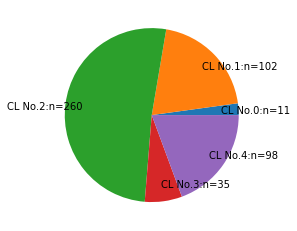

In [9]:
#件数
temp = df['Cluster'].value_counts().sort_index()
plt.pie(temp,labels=["CL No."+str(i)+':n='+str(j) for i,j in zip(temp.index,temp)],labeldistance=0.8)

In [10]:
#k=4で再度やりなおすためもう最初から一度読込
df = pd.DataFrame(data.data,columns=data.feature_names)

In [11]:
#dfに存在している変数、全てでクラスタリングを行う
kmeans = KMeans(n_clusters=4 #クラスター数 5とする
                , random_state=0).fit(df) #.fit(対象のデータ)でクラスタリングモデル作成

#クラスタ番号割当
df['Cluster'] = kmeans.predict(df) #.predictで割当

([<matplotlib.patches.Wedge at 0x7fe1a6144950>,
 [Text(-0.07439647676324063, 0.796533216033843, 'CL No.0:n=268'),
  Text(-0.5460425740756173, -0.5846687158527246, 'CL No.1:n=102'),
  Text(0.09415315330211119, -0.7944401700085848, 'CL No.2:n=38'),
  Text(0.6564275939139814, -0.45727761146627455, 'CL No.3:n=98')])

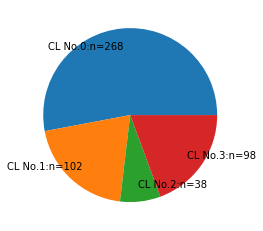

In [12]:
#件数
temp = df['Cluster'].value_counts().sort_index()
plt.pie(temp,labels=["CL No."+str(i)+':n='+str(j) for i,j in zip(temp.index,temp)],labeldistance=0.8)

## 3. 可視化と解釈

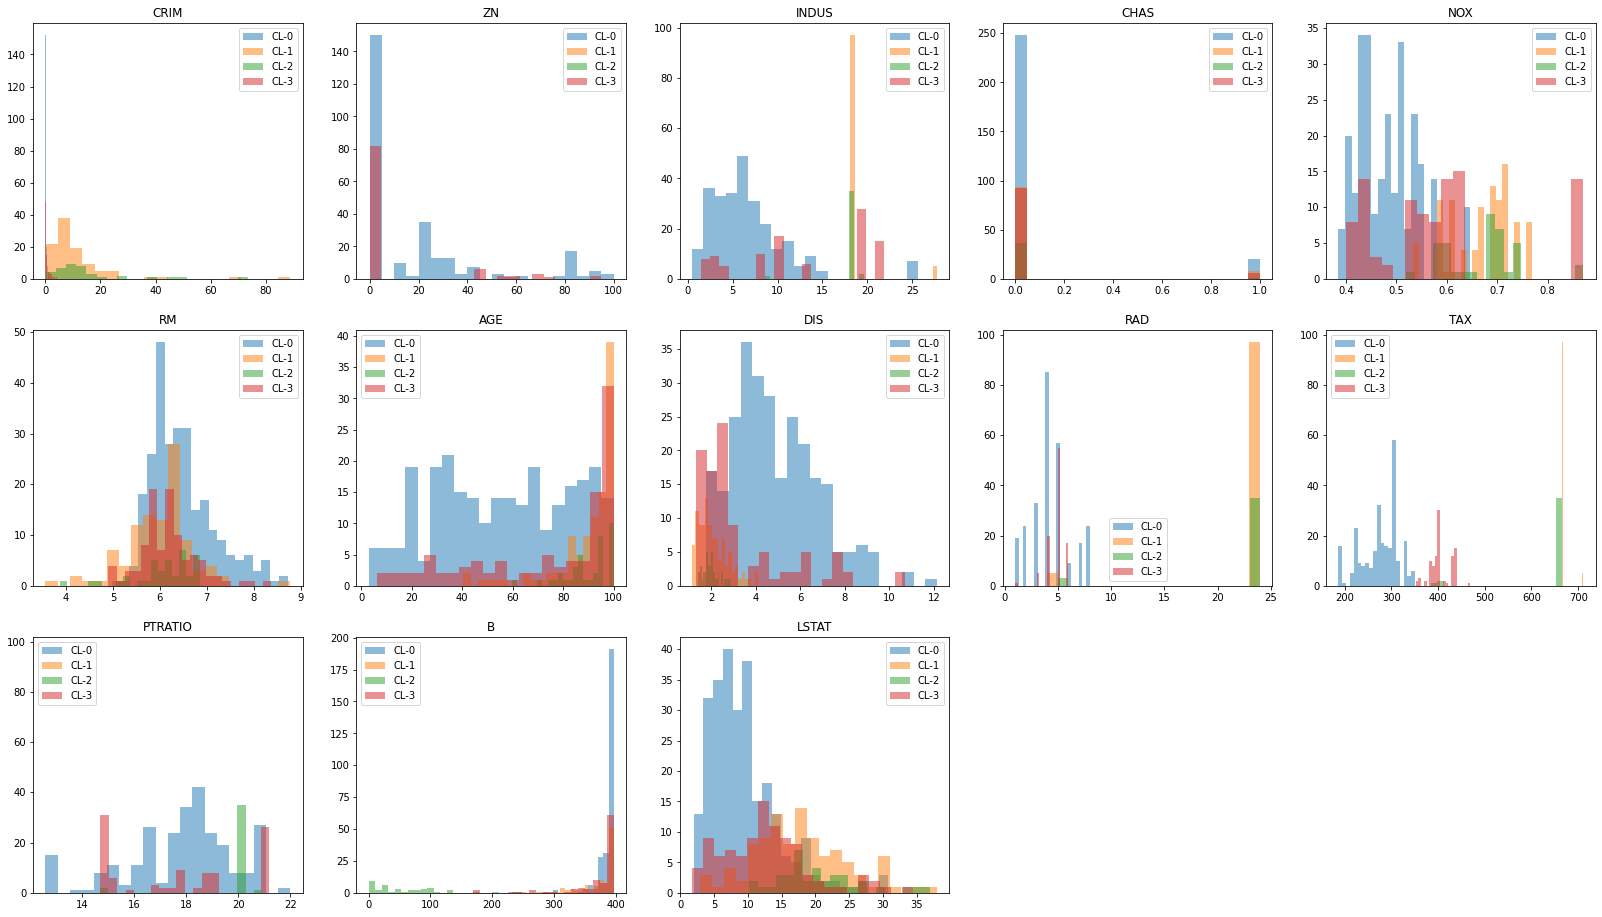

In [13]:
#クラスタ、変数ごとにヒストグラムを書く
plt.figure(figsize=(28,16))
for i,col in enumerate(df.columns[:-1]):
  plt.subplot(3,5,i+1)
  for cl in sorted(df['Cluster'].unique()):
    #print (cl)
    plt.hist(df[df['Cluster']==cl][col],alpha=0.5,label="CL-"+str(cl),bins=20)
  #sns.histplot(data=df,x=col,hue='Cluster',stat="probability")
  plt.legend()
  plt.title(col)

In [14]:
#クラスタごとの統計量
st_table = pd.concat([df.groupby("Cluster").mean(),df.groupby("Cluster")['Cluster'].size()],axis=1)

display(st_table)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Cluster
Cluster,,,,,,,,,,,,,,
0,0.241048,17.817164,6.668582,0.074627,0.483398,6.465448,55.705224,4.873560,4.313433,276.548507,17.873134,387.814067,9.538022,268
1,10.910511,0.000000,18.572549,0.078431,0.671225,5.982265,89.913725,2.077164,23.019608,668.205882,20.195098,371.803039,17.874020,102
2,15.219038,0.000000,17.926842,0.026316,0.673711,6.065500,89.905263,1.994429,22.500000,644.736842,19.928947,57.786316,20.448684,38
3,0.741291,9.948980,12.983776,0.061224,0.582235,6.189847,73.288776,3.331821,4.826531,406.081633,17.666327,371.664286,12.714898,98


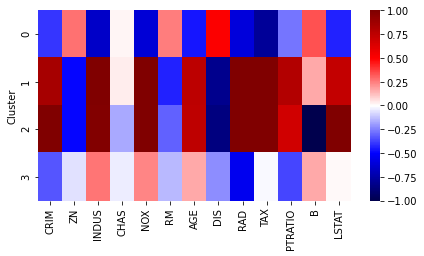

In [15]:
#heatmapを作成
plt.figure(figsize=(7,3.5))
st_table = (st_table.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std() #標準化テーブル作成
sns.heatmap(st_table,cmap='seismic',vmin=-1,vmax=1)

# 実習2

In [16]:

#google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os 
os.chdir('/content/drive/My Drive/003_Project/data') #対象データの格納場所を指定

## 1. データ準備

In [19]:
#データを読込
df2 = pd.read_csv('adult.data',header=None)
df2.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum", "MaritalStatus",
    "Occupation", "Relationship", "Race", "Gender", "CapitalGain",
    "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [20]:
#データ型を確認
df2.apply(infer_dtype)

Age              integer
WorkClass         string
fnlwgt           integer
Education         string
EducationNum     integer
MaritalStatus     string
Occupation        string
Relationship      string
Race              string
Gender            string
CapitalGain      integer
CapitalLoss      integer
HoursPerWeek     integer
NativeCountry     string
Income            string
dtype: object

In [21]:
#文字列変数のみを抽出
cols = list(df2.apply(infer_dtype)[df2.apply(infer_dtype)=='string'].index)
display(cols)

df2 = df2[cols] #colsのみ抽出

['WorkClass',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'NativeCountry',
 'Income']

In [22]:
#欠損確認
df2.isnull().sum()

WorkClass        0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
NativeCountry    0
Income           0
dtype: int64

## 2. クラスタリング

In [ ]:
#k-mode法のオブジェクト作成
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1,random_state=12345)
kmode = km.fit(df2)
df2['Cluster'] = kmode.predict(df2) #k-mode法を学習

([<matplotlib.patches.Wedge at 0x7fe19889edd0>,
 [Text(0.35022820248334935, 0.719263655543141, 'CL No.0:n=11584'),
  Text(-0.7991097728030256, -0.03773024000317115, 'CL No.1:n=9882'),
  Text(-0.3340416909817647, -0.7269223814727699, 'CL No.2:n=1445'),
  Text(0.15277306059166149, -0.7852772707505653, 'CL No.3:n=5011'),
  Text(0.7211955913675295, -0.3462324638043628, 'CL No.4:n=4639')])

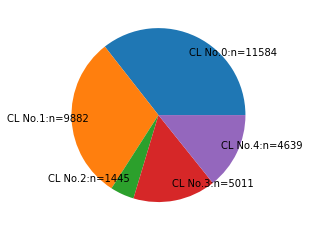

In [25]:
#件数
temp = df2['Cluster'].value_counts().sort_index()
plt.pie(temp,labels=["CL No."+str(i)+':n='+str(j) for i,j in zip(temp.index,temp)],labeldistance=0.8)

## 3. 可視化と解釈

<BarContainer object of 9 artists>

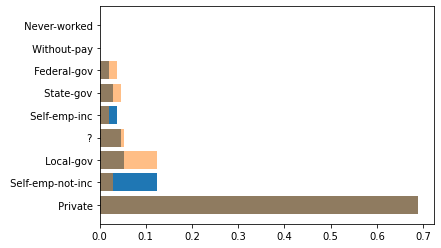

In [26]:
plt.barh(df2[df2['Cluster']==0]['WorkClass'].value_counts(normalize=True).index,df2[df2['Cluster']==0]['WorkClass'].value_counts(normalize=True))
plt.barh(df2[df2['Cluster']==1]['WorkClass'].value_counts(normalize=True).index,df2[df2['Cluster']==0]['WorkClass'].value_counts(normalize=True),alpha=0.5)

In [27]:
#Native country 加工しておく
df2['NativeCountry'] = (df2['NativeCountry']==' United-States').astype(int)

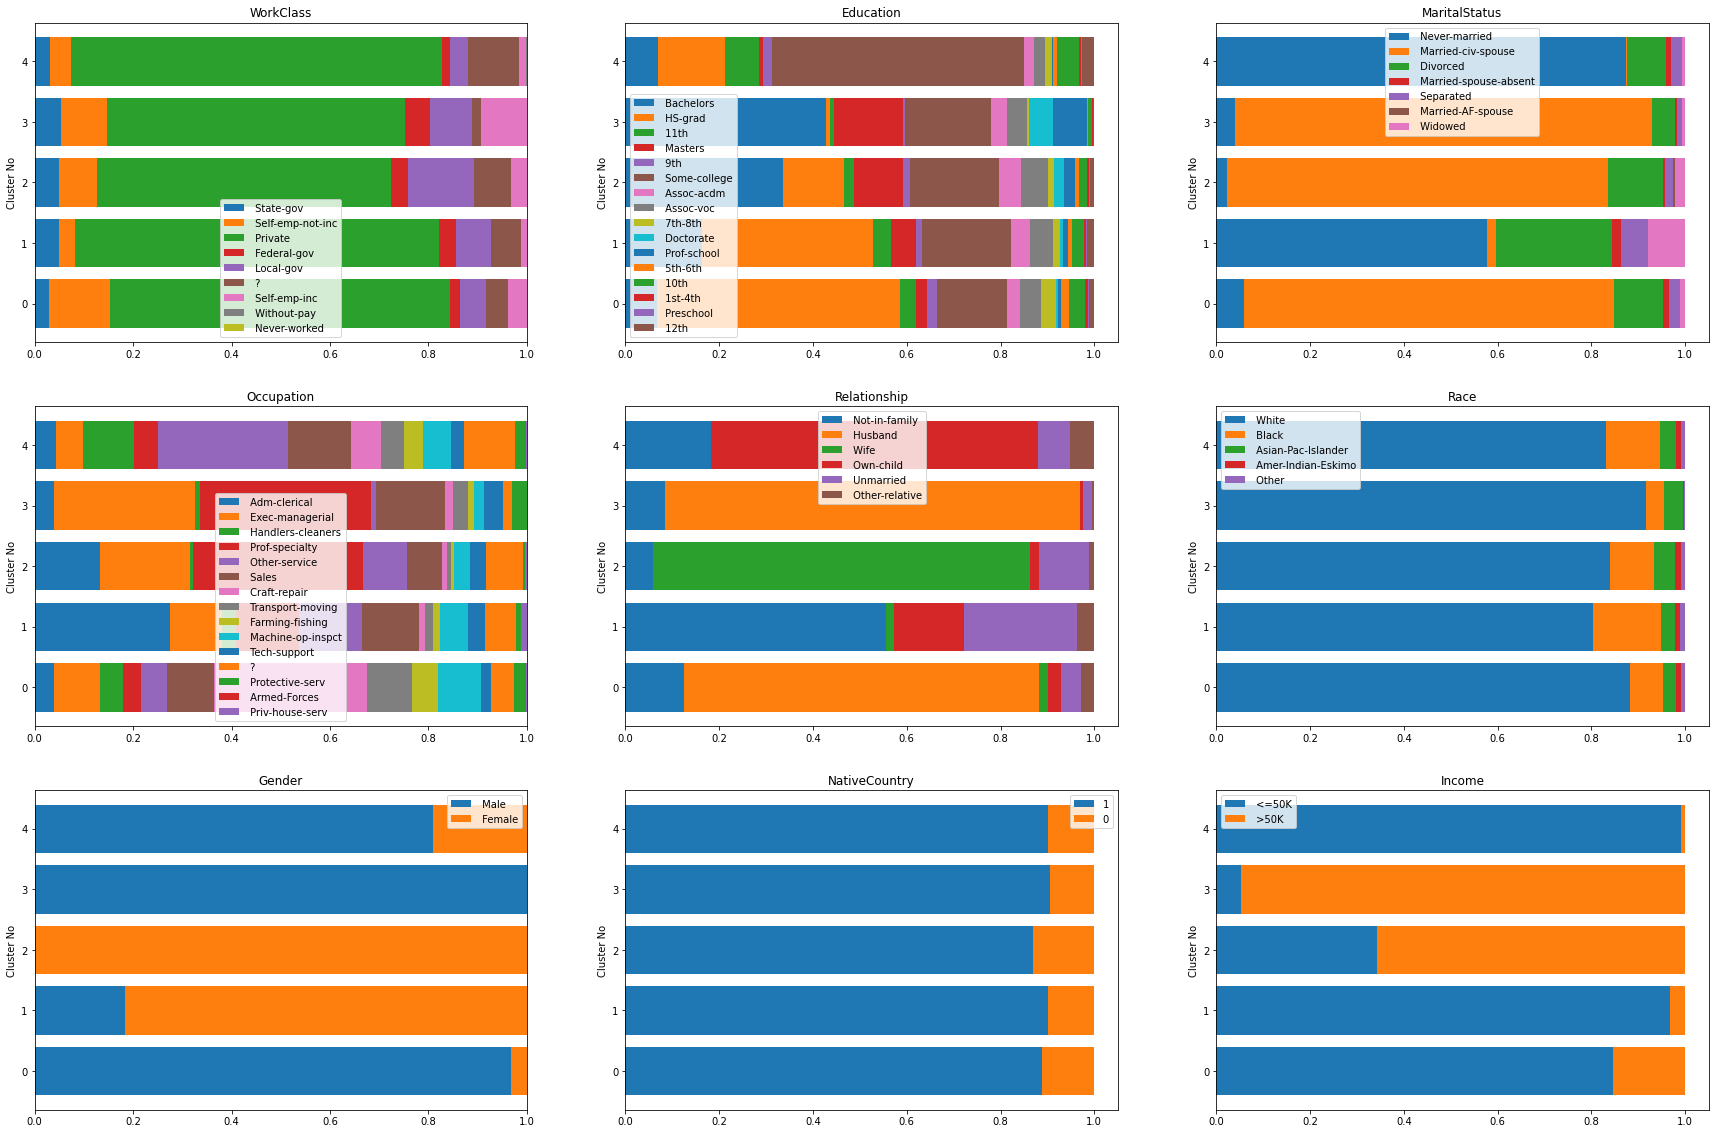

In [28]:
#積上構成比を書く
plt.figure(figsize=(30,20))
for i,col in enumerate(df2.iloc[:,:-1].columns):
  cumulative = np.zeros(5)
  plt.subplot(3,3,i+1)
  for v in df2[col].unique():
    t = df2[df2[col]==v]['Cluster'].value_counts(dropna=False).sort_index() / df2['Cluster'].value_counts().sort_index()
    t.fillna(0,inplace=True)
    plt.barh(t.index,t,left=cumulative,label=v)
    cumulative += t
  plt.legend()
  plt.ylabel('Cluster No')
  plt.title(col)